## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Importing Datasets

In [2]:
data_path = './Data/'

df_ev_sales = pd.read_csv(data_path + 'sold_EVs.csv')
df_ev_statewise_vehicles = pd.read_csv(data_path + 'state_wise_EVs.csv')
df_charging_stations = pd.read_csv(data_path + 'charging_stations_state_wise.csv')
df_consumer_behavior = pd.read_csv(data_path + 'Indian automoble buying behavour study 1.0.csv')

## Handling Missing Values

In [3]:
print("\nMissing Values in Electric Vehicle Sales Data:")
print(df_ev_sales.isnull().sum())

print("\nMissing Values in Electric Vehicle Statewise Data:")
print(df_ev_statewise_vehicles.isnull().sum())

print("\nMissing Values in Charging Stations Data:")
print(df_charging_stations.isnull().sum())

print("\nMissing Values in Consumer Behavior Data:")
print(df_consumer_behavior.isnull().sum())


Missing Values in Electric Vehicle Sales Data:
Sl. No.                 0
Wheeler Type            0
Total No. of Vehicle    0
dtype: int64

Missing Values in Electric Vehicle Statewise Data:
Sl. No                                                         0
State/UT                                                       0
Till date State wise - Total Number of Vehicles Registered     0
Till date State wise - Total Vehicle Registered as Electric    0
Proportion of Electric Vehicle                                 0
dtype: int64

Missing Values in Charging Stations Data:
Sl. No.                   0
State/UT                  0
No. of Operational PCS    0
dtype: int64

Missing Values in Consumer Behavior Data:
Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dt

In [4]:
print("\nDescriptive Statistics for Consumer Behavior Data:")
print(df_consumer_behavior.describe())


Descriptive Statistics for Consumer Behavior Data:
             Age  No of Dependents        Salary   Wife Salary  Total Salary  \
count  99.000000         99.000000  9.900000e+01  9.900000e+01  9.900000e+01   
mean   36.313131          2.181818  1.736364e+06  5.343434e+05  2.270707e+06   
std     6.246054          1.335265  6.736217e+05  6.054450e+05  1.050777e+06   
min    26.000000          0.000000  2.000000e+05  0.000000e+00  2.000000e+05   
25%    31.000000          2.000000  1.300000e+06  0.000000e+00  1.550000e+06   
50%    36.000000          2.000000  1.600000e+06  5.000000e+05  2.100000e+06   
75%    41.000000          3.000000  2.200000e+06  9.000000e+05  2.700000e+06   
max    51.000000          4.000000  3.800000e+06  2.100000e+06  5.200000e+06   

              Price  
count  9.900000e+01  
mean   1.194040e+06  
std    4.376955e+05  
min    1.100000e+05  
25%    8.000000e+05  
50%    1.200000e+06  
75%    1.500000e+06  
max    3.000000e+06  


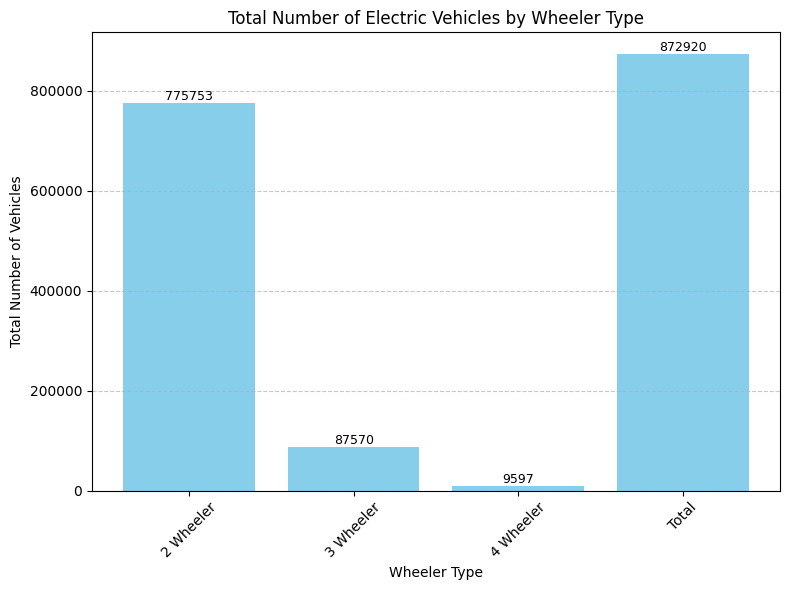

In [5]:
wheeler_types = df_ev_sales['Wheeler Type']
total_vehicles = df_ev_sales['Total No. of Vehicle']

plt.figure(figsize=(8, 6))
bars = plt.bar(wheeler_types, total_vehicles, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom', ha='center', color='black', fontsize=9)

plt.title('Total Number of Electric Vehicles by Wheeler Type')
plt.xlabel('Wheeler Type')
plt.ylabel('Total Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart titled  *Total Number of Electric Vehicles by Wheeler Type* shows the distribution of electric vehicles in India according to vehicle type. As of the data collection date (unspecified), 2-wheelers make up the largest segment, accounting for over 775,700 units, or roughly 89% of the total.  3-wheelers represent a small portion of the market at around 8,750 units (1%). The remaining 4-wheeler category encompasses nearly 87,290 electric vehicles, constituting approximately 10% of the market share.

**Key Takeaways:**

* 2-wheelers dominate the Indian electric vehicle market.
* 4-wheelers have a lower market share compared to 2-wheelers.
* 3-wheelers represent a marginal portion of the market.

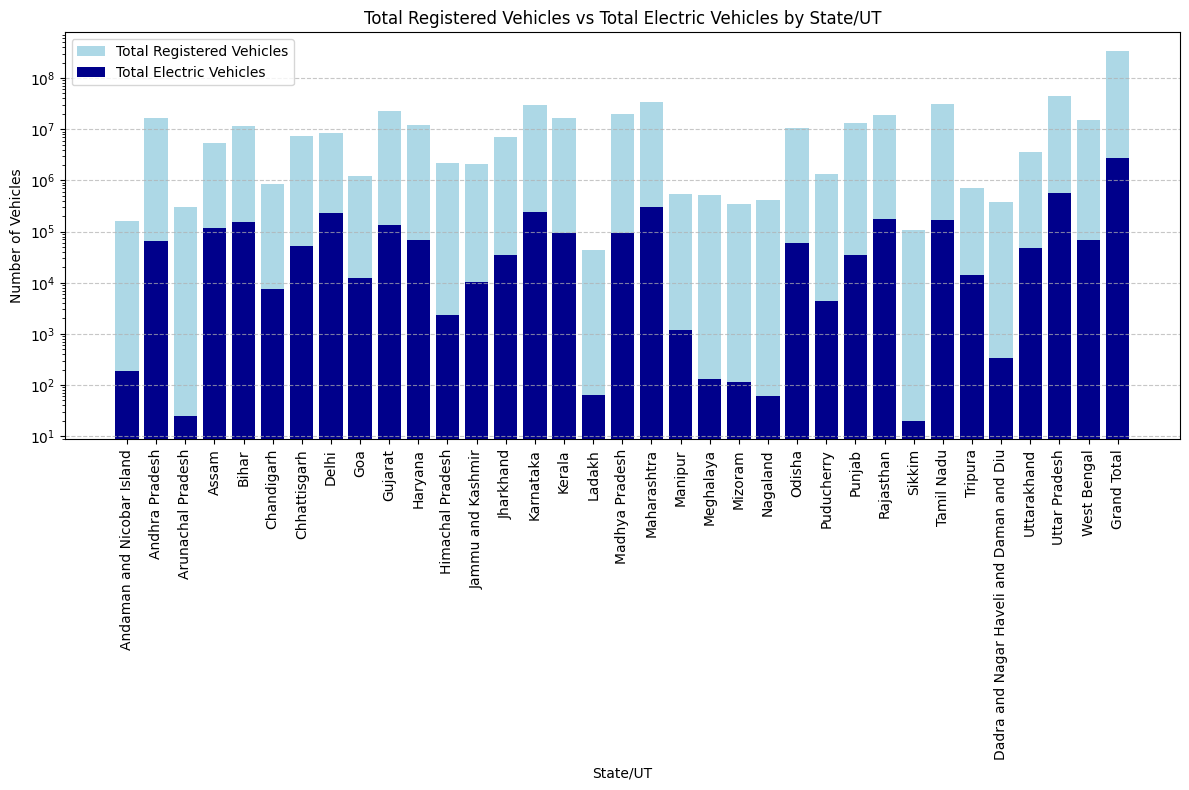

In [6]:
states = df_ev_statewise_vehicles['State/UT']
total_registered = df_ev_statewise_vehicles['Till date State wise - Total Number of Vehicles Registered']
total_ev_registered = df_ev_statewise_vehicles['Till date State wise - Total Vehicle Registered as Electric']

plt.figure(figsize=(12, 8))
plt.bar(states, total_registered, color='lightblue', label='Total Registered Vehicles')
plt.bar(states, total_ev_registered, color='darkblue', label='Total Electric Vehicles')
plt.yscale('log')
plt.title('Total Registered Vehicles vs Total Electric Vehicles by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The chart titled *Total Registered Vehicles vs Total Electric Vehicles by State/UT* provides a comparative view of electric vehicle (EV) adoption across different Indian states and union territories (UTs). The x-axis represents the state/UT, while the y-axis shows the number of vehicles on two separate scales: total registered vehicles (right axis) and total electric vehicles (left axis).

**Observations:**

* States likely with higher overall vehicle registrations tend to have higher numbers of electric vehicles as well. However, the exact correlation cannot be determined from this graph alone.


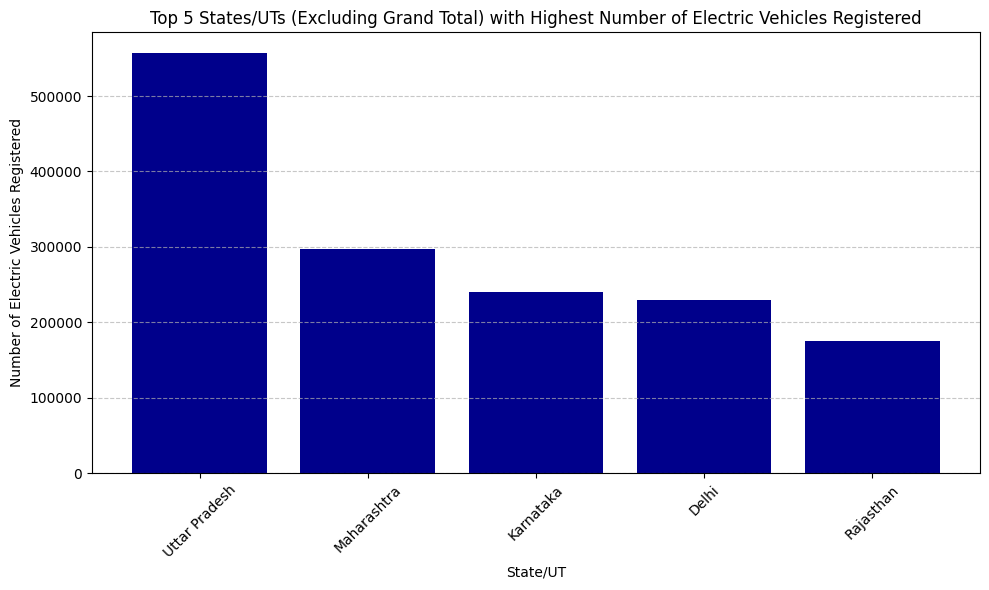

In [7]:
df_filtered_ev_states = df_ev_statewise_vehicles[df_ev_statewise_vehicles['State/UT'] != 'Grand Total']

df_top5_ev_states = df_filtered_ev_states.sort_values(by='Till date State wise - Total Vehicle Registered as Electric', ascending=False).head(5)

top5_states = df_top5_ev_states['State/UT']
top5_ev_registered = df_top5_ev_states['Till date State wise - Total Vehicle Registered as Electric']

plt.figure(figsize=(10, 6))
plt.bar(top5_states, top5_ev_registered, color='darkblue')
plt.title('Top 5 States/UTs (Excluding Grand Total) with Highest Number of Electric Vehicles Registered')
plt.xlabel('State/UT')
plt.ylabel('Number of Electric Vehicles Registered')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The chart titled *Top 5 States/UTs (Excluding Grand Total) with Highest Number of Electric Vehicles Registered* shows the number of electric vehicles registered in the leading Indian states and union territories (UTs). The y-axis represents the number of electric vehicles registered, while the x-axis lists the states/UTs in descending order based on their EV registration count.

**Key Observations:**

* Uttar Pradesh has the highest number of registered electric vehicles, followed by Maharashtra, Karnataka, Delhi, and Rajasthan.

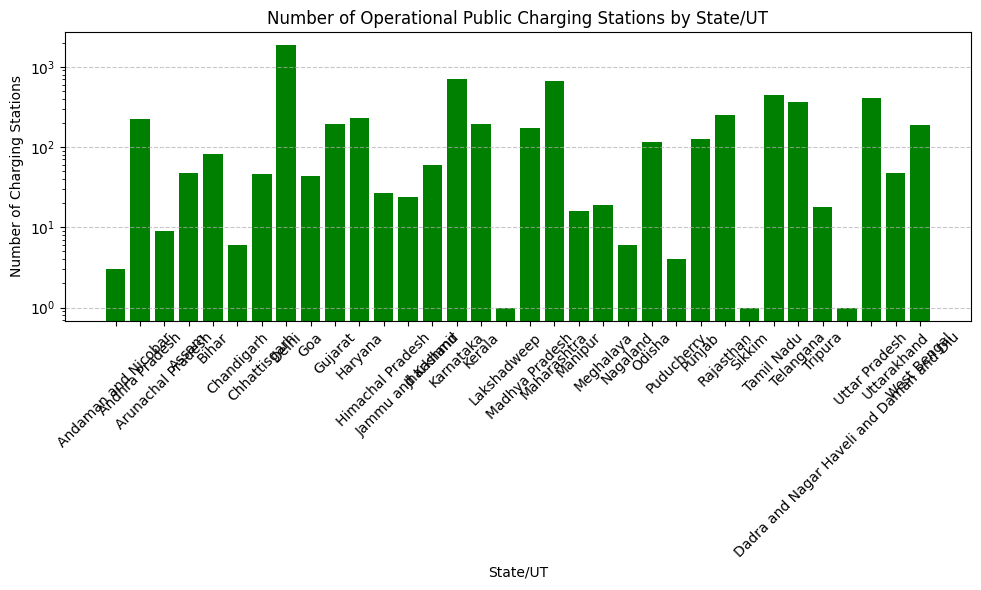

In [8]:
df_filtered_charging_stations = df_charging_stations[df_charging_stations['State/UT'] != 'Total']

states = df_filtered_charging_stations['State/UT']
charging_stations = df_filtered_charging_stations['No. of Operational PCS']

plt.figure(figsize=(10, 6))
plt.bar(states, charging_stations, color='green')

plt.yscale('log')

plt.title('Number of Operational Public Charging Stations by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart titled *Number of Operational Public Charging Stations by State/UT* depicts the distribution of operational public electric vehicle (EV) charging stations across various Indian states and union territories (UTs). The x-axis represents the state/UT, and the y-axis indicates the number of operational public charging stations.

**Observations:**

* The graph reveals variations in the availability of public charging stations across different Indian states/UTs. Some states/UTs might have a higher concentration of charging stations compared to others.

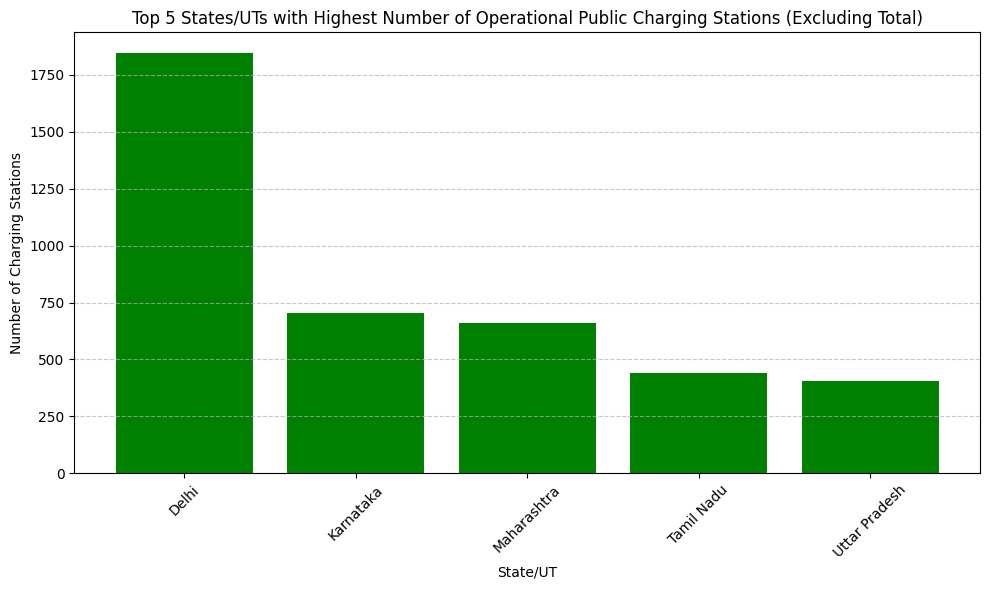

In [9]:
df_filtered_charging_stations = df_charging_stations[df_charging_stations['State/UT'] != 'Total']

df_top5_charging_stations = df_filtered_charging_stations.sort_values(by='No. of Operational PCS', ascending=False).head(5)

top5_states = df_top5_charging_stations['State/UT']
top5_charging_stations = df_top5_charging_stations['No. of Operational PCS']

plt.figure(figsize=(10, 6))
plt.bar(top5_states, top5_charging_stations, color='green')
plt.title('Top 5 States/UTs with Highest Number of Operational Public Charging Stations (Excluding Total)')
plt.xlabel('State/UT')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart titled *Top 5 States/UTs with Highest Number of Operational Public Charging Stations (Excluding Total)* shows the number of Operational Charging Stations in the leading Indian states and union territories (UTs). The y-axis represents the number of electric vehicles registered, while the x-axis lists the states/UTs in descending order based on their EV registration count.

**Key Observations:**

* Delhi has the highest number of Operational Public Charging Stations, followed by Karnataka, Maharashtra, Tamil Nadu, and Uttar Pradesh.

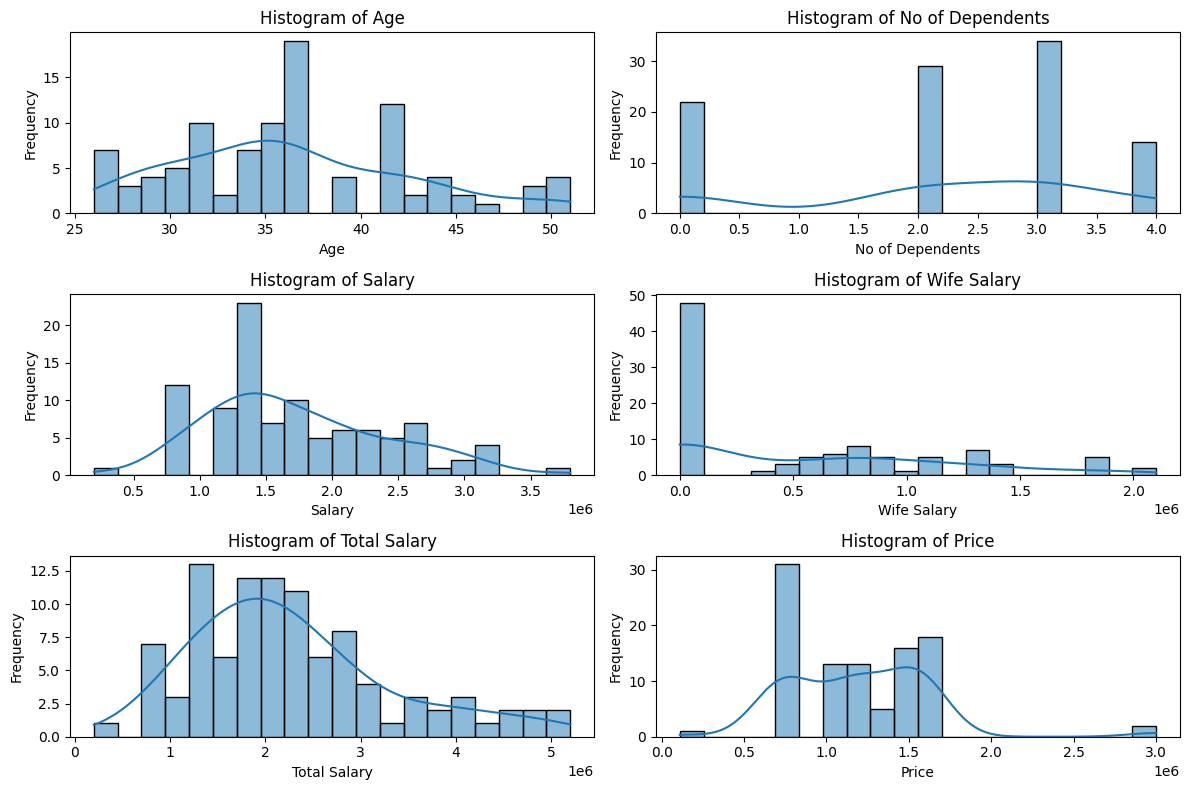

C:\Users\prasa\AppData\Local\Temp\ipykernel_11268\2760222136.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_consumer_behavior, x=column, palette='viridis')
C:\Users\prasa\AppData\Local\Temp\ipykernel_11268\2760222136.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_consumer_behavior, x=column, palette='viridis')
C:\Users\prasa\AppData\Local\Temp\ipykernel_11268\2760222136.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_consumer_behavior, x=column, palette='viridis')
C:\Users\prasa\AppData\Local\Te

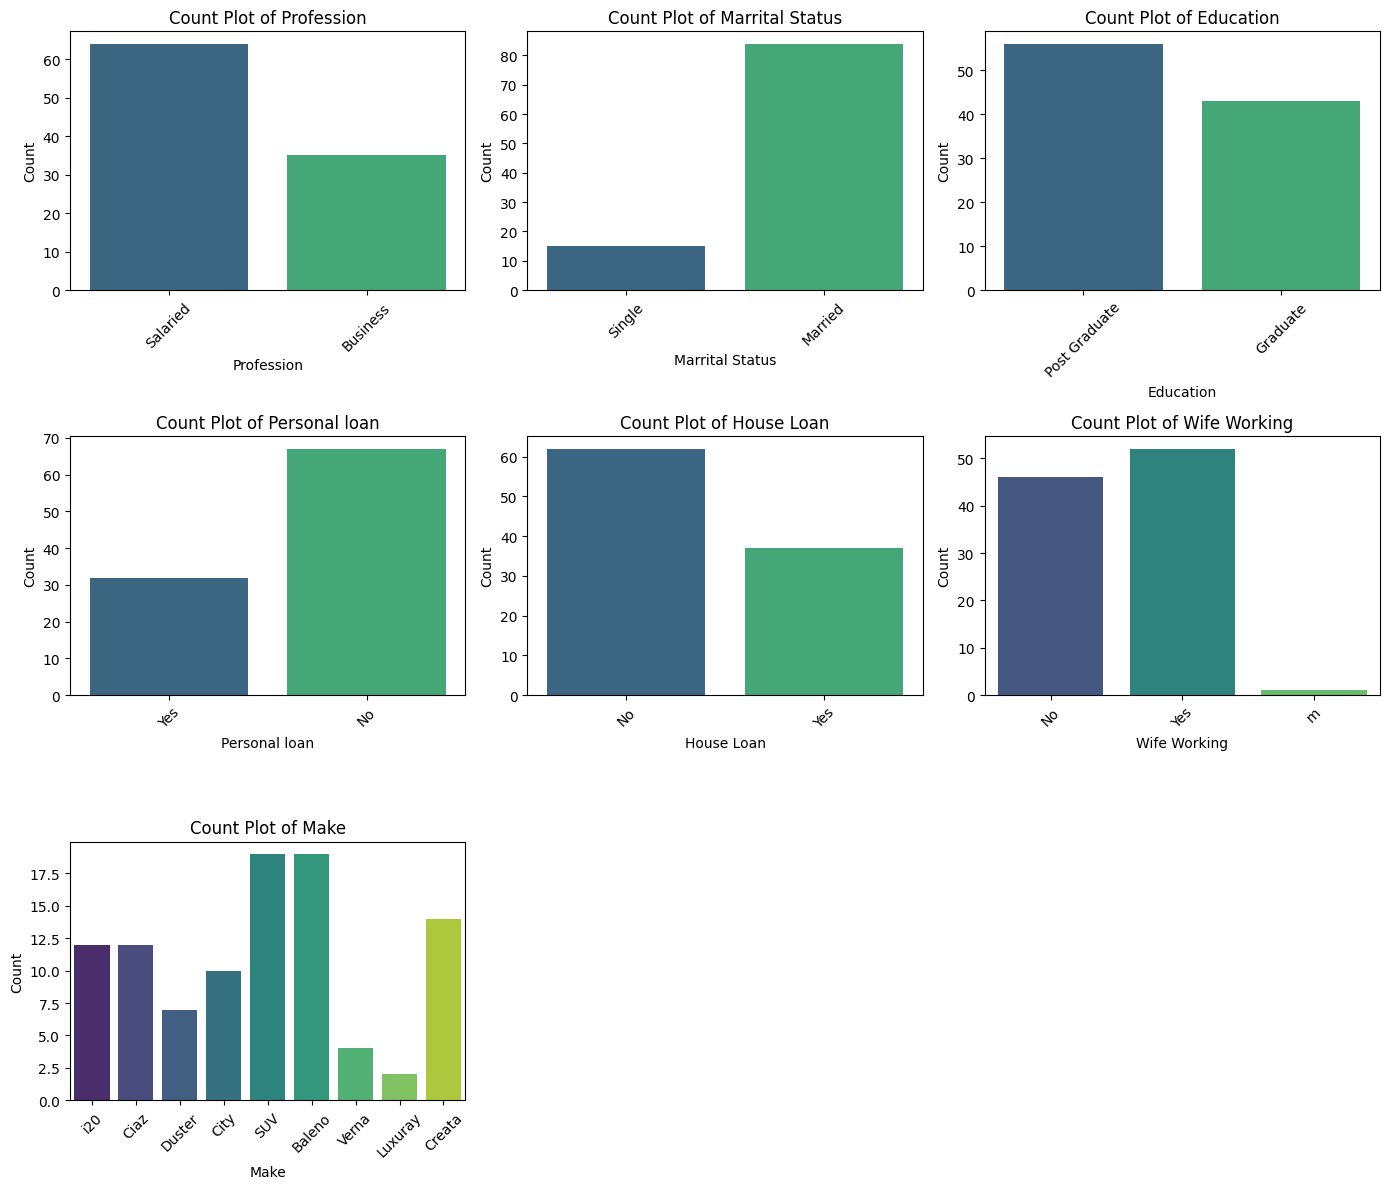

In [10]:
numerical_columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_consumer_behavior[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']
plt.figure(figsize=(14, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df_consumer_behavior, x=column, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
for i in df_consumer_behavior.columns:
    if df_consumer_behavior[i].dtype=='object':
        print(i, '-', df_consumer_behavior[i].unique())

Profession - ['Salaried' 'Business']
Marrital Status - ['Single' 'Married']
Education - ['Post Graduate' 'Graduate']
Personal loan - ['Yes' 'No']
House Loan - ['No' 'Yes']
Wife Working - ['No' 'Yes' 'm']
Make - ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [12]:
df_consumer_behavior['Wife Working'].replace('m', 'No', inplace=True)

encoding_dict = {
    'Profession': {'Salaried': 0, 'Business': 1},
    'Marrital Status': {'Single': 0, 'Married': 1},
    'Education': {'Post Graduate': 0, 'Graduate': 1},
    'Personal loan': {'Yes': 1, 'No': 0},
    'House Loan': {'Yes': 1, 'No': 0},
    'Wife Working': {'Yes': 1, 'No': 0}
}

for col, encoding in encoding_dict.items():
    df_consumer_behavior[col].replace(encoding, inplace=True)

df_consumer_behavior.drop(columns=['Make'], inplace=True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_11268\542615490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_consumer_behavior['Wife Working'].replace('m', 'No', inplace=True)
C:\Users\prasa\AppData\Local\Temp\ipykernel_11268\542615490.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [13]:
df_consumer_behavior

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,0,0,0,0,1,0,0,800000,0,800000,800000
1,35,0,1,0,2,1,1,1,1400000,600000,2000000,1000000
2,45,1,1,1,4,1,1,0,1800000,0,1800000,1200000
3,41,1,1,0,3,0,0,1,1600000,600000,2200000,1200000
4,31,0,1,0,2,1,0,1,1800000,800000,2600000,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,1,0,1,0,0,0,0,2400000,0,2400000,1600000
95,50,0,1,0,3,0,0,1,3800000,1300000,5100000,1600000
96,51,1,1,1,2,1,1,0,2200000,0,2200000,1100000
97,51,0,1,0,2,0,0,1,2700000,1300000,4000000,1500000


In [14]:
scaler = StandardScaler()

scaled = scaler.fit_transform(df_consumer_behavior)
scaled = pd.DataFrame(scaled, columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
                                       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
                                       'Total Salary', 'Price'])

scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,-0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,-0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,-0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,-0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,-0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,-0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


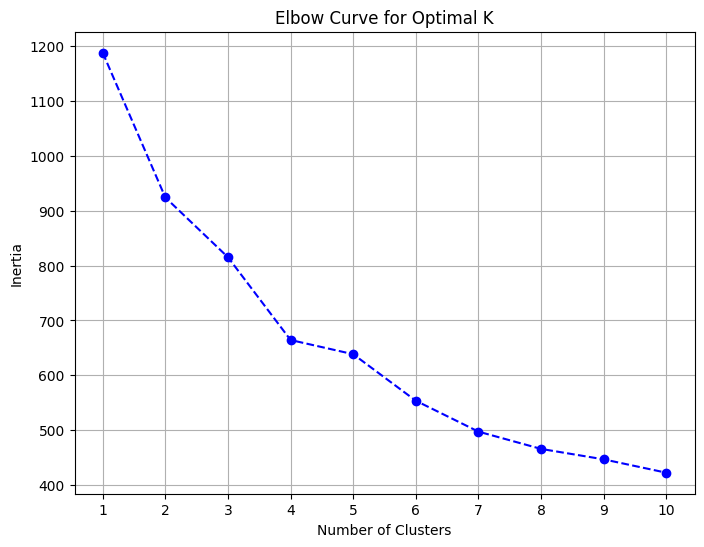

In [15]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, random_state=0)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

K = 4 or n_clusters = 4

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=0)
kmeans.fit(scaled)

df_consumer_behavior['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

scaled['Cluster'] = kmeans.labels_

sns.pairplot(scaled, hue='Cluster')
plt.show()

**Customer Segmentation for the Indian Electric Vehicle Market**

This chart depicts the results of K-Means clustering applied to Indian electric vehicle (EV) market data, segmenting potential customers into four distinct clusters. Data points are colored to indicate their assigned cluster (0, 1, 2, or 3).

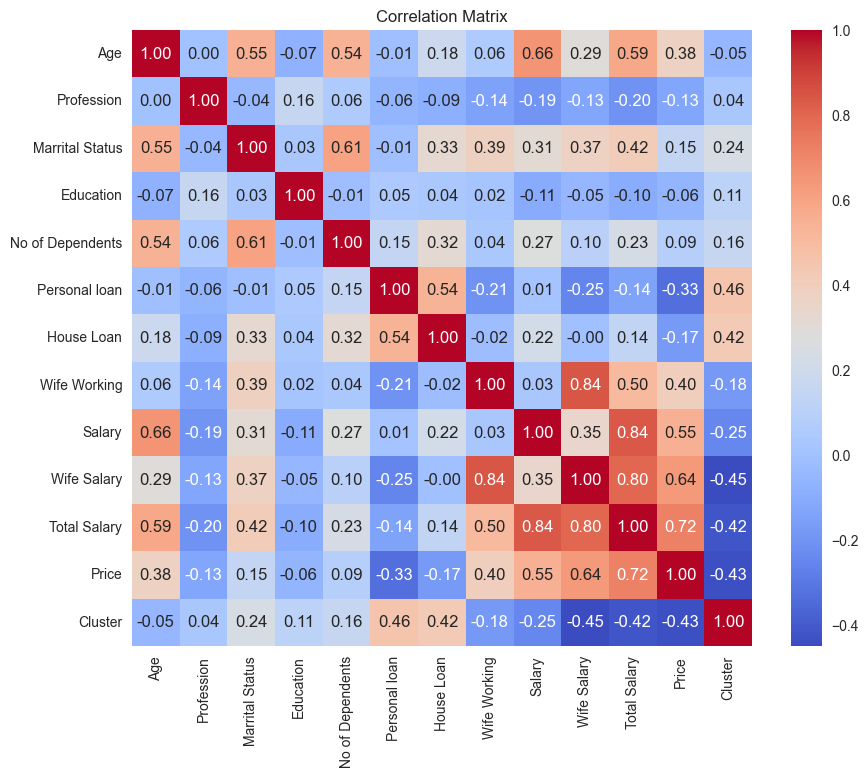

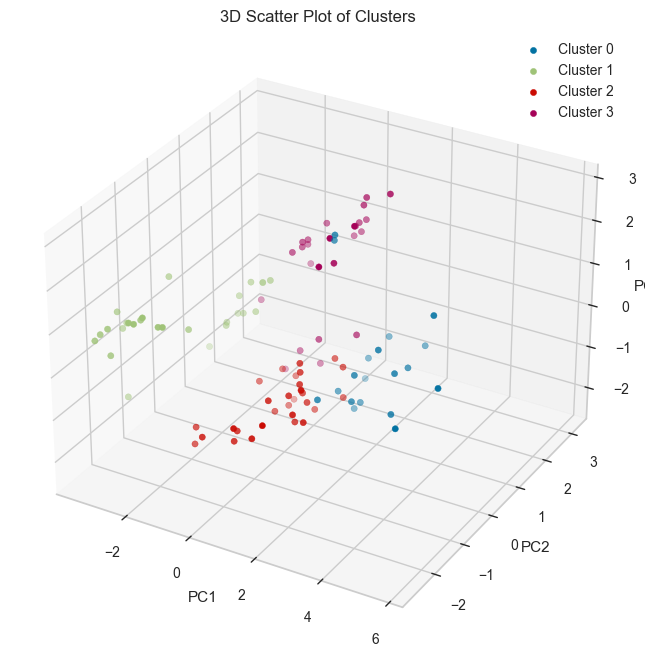

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled)
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

df_pca['Cluster'] = kmeans.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Clusters')
ax.legend()
plt.show()